In [1]:
%matplotlib notebook

import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import pygalmesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

sys.path.append('..')
import mycode as code

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: dv001
--------------------------------------------------------------------------


In [3]:
def estimate_limit(x):
    x_min, x_max = np.min(x), np.max(x)
    x_range = x_max - x_min
    return x_min - x_range/20, x_max + x_range/20

def plot_mesh(vertices, facets, **kwargs):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    polys = Poly3DCollection(vertices[facets], **kwargs)
    ax.add_collection(polys)
    ax.set_xlim(estimate_limit(vertices.flatten()))
    ax.set_ylim(estimate_limit(vertices.flatten()))
    ax.set_zlim(estimate_limit(vertices.flatten()))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return fig, ax

<IPython.core.display.Javascript object>


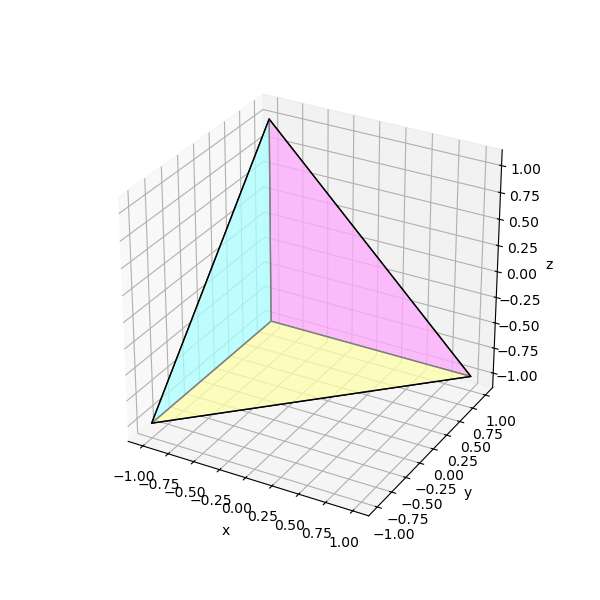

In [4]:
vertices = np.array([
    [-1,  1, -1],
    [-1,  1,  1],
    [-1, -1, -1],
    [ 1,  1, -1],
])
facets = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [0, 2, 3],
    [1, 2, 3]
])
colors = [
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
]
fig, ax = plot_mesh(vertices, facets, alpha=0.5, edgecolors='black', facecolors=colors)

[0.         0.         1.         0.57735027]


<IPython.core.display.Javascript object>


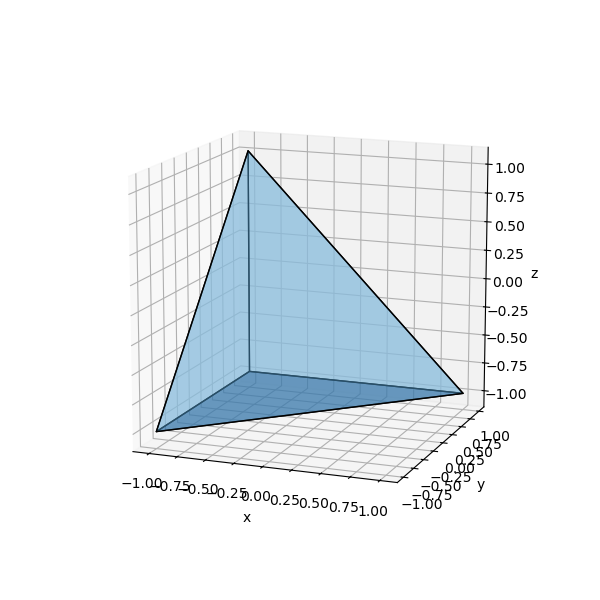

In [27]:
import matplotlib
from matplotlib.colors import ListedColormap

def compute_angles_to_xy_plane(vertices, facets):
    edges1 = vertices[facets[:,0]] - vertices[facets[:,1]]
    edges2 = vertices[facets[:,0]] - vertices[facets[:,2]]
    facet_normals = np.cross(edges1, edges2)
    norms = np.linalg.norm(facet_normals, axis=1)
    xy_normal = [0, 0, 1]
    cos_angles = (facet_normals @ xy_normal) / norms
    return cos_angles

angles = compute_angles_to_xy_plane(vertices, facets)
print(angles)
colors = matplotlib.colormaps['Blues'](angles)

fig, ax = plot_mesh(vertices, facets, alpha=0.5, edgecolors='black', facecolors=colors)

(504, 3)
(1000, 3)
(2230, 4)


<IPython.core.display.Javascript object>


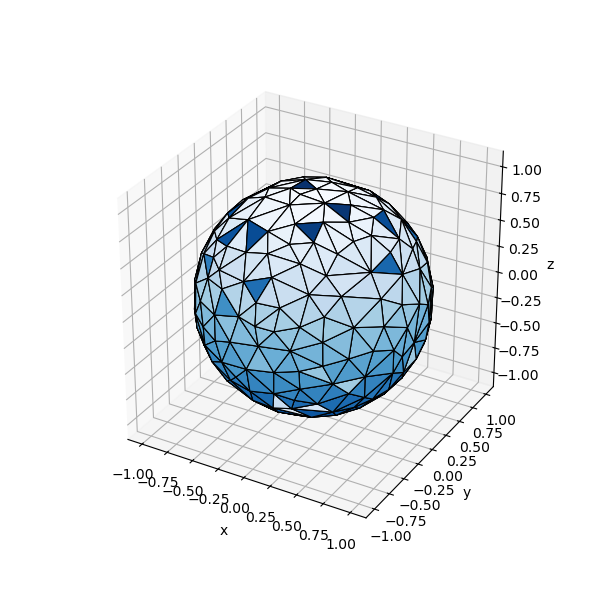

CPU times: user 178 ms, sys: 3.06 ms, total: 181 ms
Wall time: 181 ms


In [67]:
%%time
ball = pygalmesh.Ball([0,0,0], 1.0)
mesh = pygalmesh.generate_mesh(ball, max_cell_circumradius=0.2)

print(mesh.points.shape)
print(mesh.cells[0].data.shape)
print(mesh.cells[1].data.shape)

angles = compute_angles_to_xy_plane(mesh.points, mesh.cells[0].data)
colors = matplotlib.colormaps['Blues_r']((angles + 1)/2)

fig, ax = plot_mesh(mesh.points, mesh.cells[0].data, alpha=1.0, edgecolors='black', linewidth=0.8, facecolors=colors)

<IPython.core.display.Javascript object>


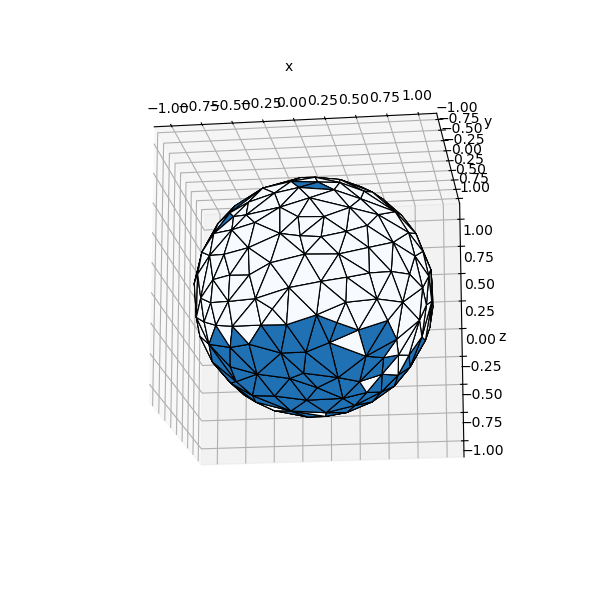

In [68]:
angles = compute_angles_to_xy_plane(mesh.points, mesh.cells[0].data)
colors = matplotlib.colormaps['Blues']((angles < -0.5) * 0.75)

fig, ax = plot_mesh(mesh.points, mesh.cells[0].data, alpha=1.0, edgecolors='black', linewidth=0.8, facecolors=colors)

In [33]:
ds = code.imaging.Emory4DCTDataset('../data/Emory-4DCT')
ds

Emory4DCTDataset([
  Emory4DCTCase('../data/Emory-4DCT', 'Case1Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case2Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case3Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case4Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case5Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case6Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case7Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case8Deploy', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case9Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case10Pack', 10 phases)
])

In [34]:
ds.load_niftis()
ds.load_masks(roi='lung_combined_mask')

Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T00.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T10.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T20.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T30.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T40.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T50.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T60.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T70.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T80.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T90.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T00.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T10.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T20.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T30.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T40.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T50.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIF

Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T60/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T70/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T80/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T90/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T00/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T10/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T20/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T30/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T40/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T50/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T60/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case

FileNotFoundError: No such file or no access: '../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T00/lung_combined_mask.nii.gz'

(15212, 3)
(19832, 3)
(77670, 4)


<IPython.core.display.Javascript object>


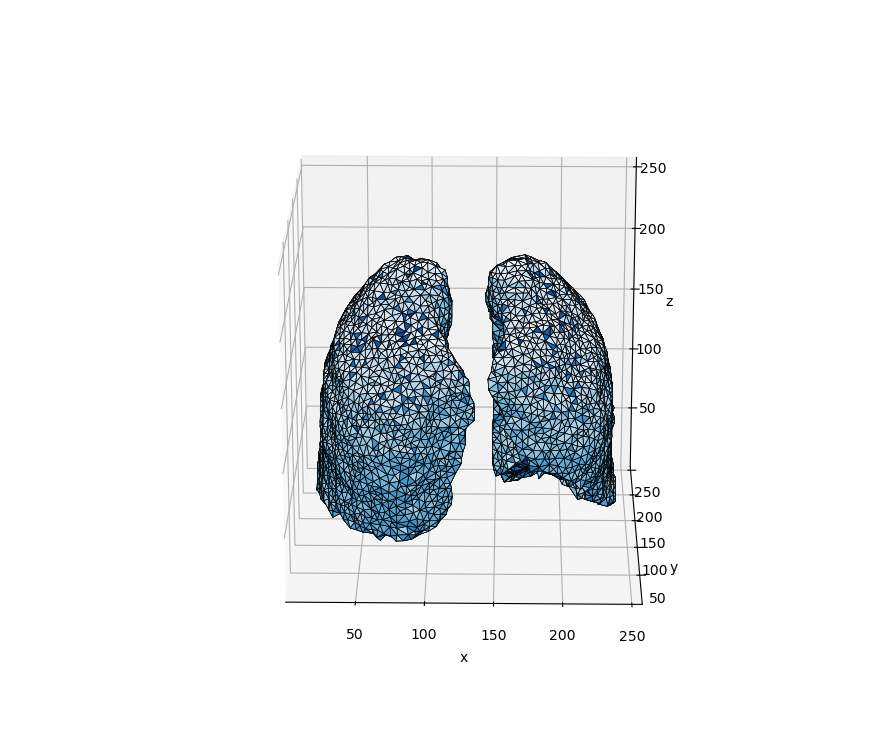

In [50]:
array = ds[0].mask.values[0].astype(np.uint16)
mesh = pygalmesh.generate_from_array(array, voxel_size=ds[0].resolution, max_cell_circumradius=5.0)

print(mesh.points.shape)
print(mesh.cells[0].data.shape)
print(mesh.cells[1].data.shape)

angles = compute_angles_to_xy_plane(mesh.points, mesh.cells[0].data)
colors = matplotlib.colormaps['Blues_r']((angles + 1) / 2)

fig, ax = plot_mesh(mesh.points, mesh.cells[0].data, alpha=1.0, edgecolors='black', linewidth=0.5, facecolors=colors)

<IPython.core.display.Javascript object>


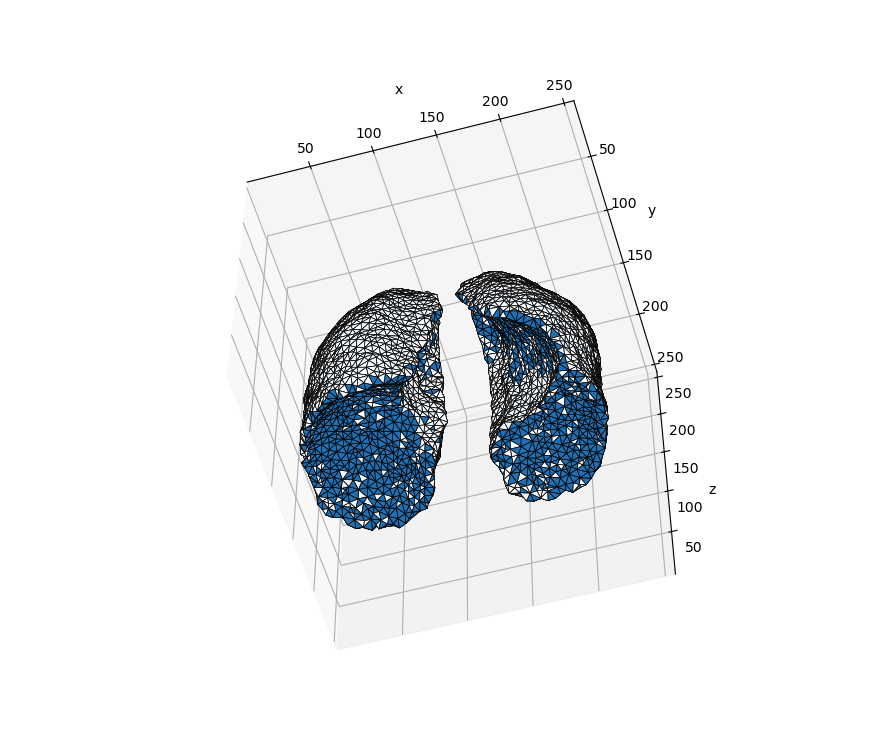

In [57]:
angles = compute_angles_to_xy_plane(mesh.points, mesh.cells[0].data)
facing_downward = (angles < -0.5)
colors = matplotlib.colormaps['Blues'](facing_downward * 0.75)

fig, ax = plot_mesh(mesh.points, mesh.cells[0].data, alpha=1.0, edgecolors='black', linewidth=0.5, facecolors=colors)

array([ 79.84081,  79.84082, 147.52928, ...,  90.12982,  93.67887,
        93.67887], dtype=float32)

<IPython.core.display.Javascript object>


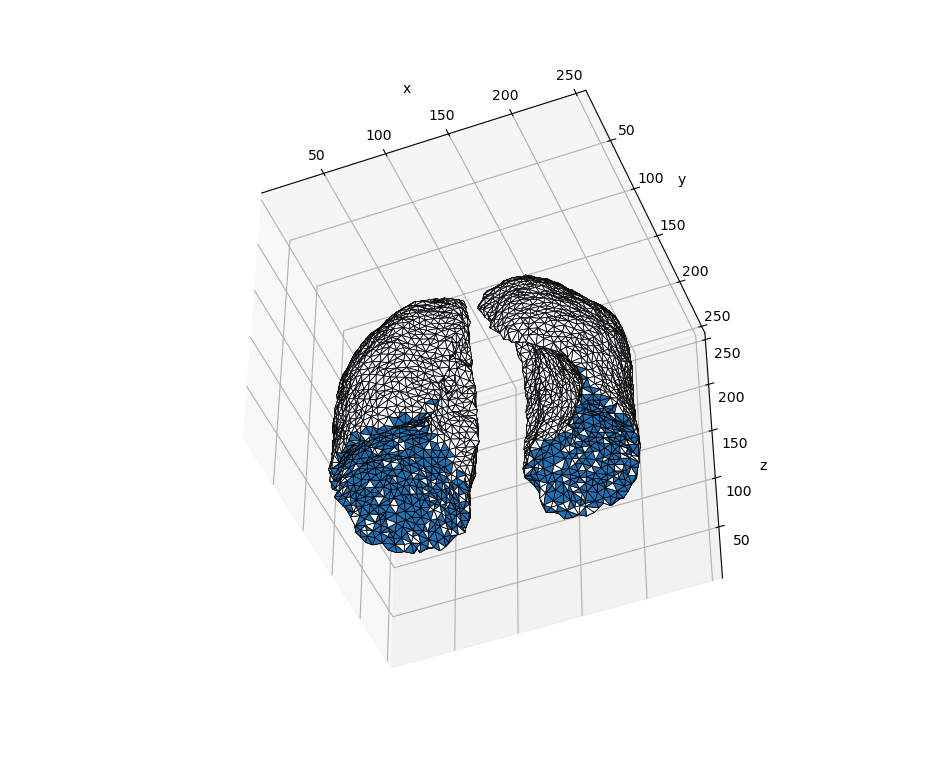

In [65]:
angles = compute_angles_to_xy_plane(mesh.points, mesh.cells[0].data)
facing_downward = (angles < -0.5)

centers = mesh.points[mesh.cells[0].data].mean(axis=1)
z = centers[:,2]

lower_portion = (z - z.min()) / (z.max() - z.min()) < 0.2
colors = matplotlib.colormaps['Blues']((facing_downward & lower_portion) * 0.75)

fig, ax = plot_mesh(mesh.points, mesh.cells[0].data, alpha=1.0, edgecolors='black', linewidth=0.5, facecolors=colors)